# **With All Features**

# **Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/preprocessed.csv')

In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,50,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,50,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,50,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,50,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,50,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,False,6
145456,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,False,6
145457,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,False,6
145458,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False,6


In [ ]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define reduced param space
param_dist = {
    'n_estimators': [64, 100],          # fewer values
    'max_features': [2, 3],             # fewer values
    'bootstrap': [True],                # only use bootstrap
    'oob_score': [True]                 # oob_score works only with bootstrap=True
}

# Initialize model
rfc = RandomForestClassifier()

# Use RandomizedSearchCV with n_iter
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=5,              # number of parameter settings sampled
    cv=3,                  # 3-fold cross validation
    verbose=1,
    n_jobs=-1,             # run in parallel
    random_state=42
)

# Fit
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_features': [2, 3],
                                        'n_estimators': [64, 100],
                                        'oob_score': [True]},
                   random_state=42, verbose=1)

In [ ]:
# Access the best parameters from the random_search object
random_search.best_params_

# Access the best estimator from the random_search object for making predictions
best_model = random_search.best_estimator_

from sklearn.metrics import confusion_matrix, classification_report
# Make predictions using the best model found by random search
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[32570  1488]
 [ 4956  4624]]


              precision    recall  f1-score   support

       False       0.87      0.96      0.91     34058
        True       0.76      0.48      0.59      9580

    accuracy                           0.85     43638
   macro avg       0.81      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638



# **Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/preprocessed.csv')

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,50,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,50,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,50,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,50,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,50,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12


In [ ]:
X = df.drop('RainTomorrow', axis=1)

In [ ]:
y = df['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    importance = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    print(importance)
    print('\n')
    sns.barplot(x = 'Feature Importance', y = importance.index, data=importance)

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

       False       0.87      0.85      0.86     34058
        True       0.50      0.54      0.52      9580

    accuracy                           0.78     43638
   macro avg       0.69      0.70      0.69     43638
weighted avg       0.79      0.78      0.79     43638



               Feature Importance
Humidity3pm              0.262010
WindGustSpeed            0.066227
Pressure3pm              0.063131
Sunshine                 0.050139
Pressure9am              0.041960
Location                 0.041740
Humidity9am              0.041179
MinTemp                  0.040928
Evaporation              0.039613
Temp9am                  0.039211
Temp3pm                  0.037195
MaxTemp                  0.033859
WindSpeed3pm             0.031453
WindSpeed9am             0.029873
WindDir3pm               0.028924
WindGustDir              0.028454
Rainfall                 0.028188
WindDir9am               0.026747
Date_month               

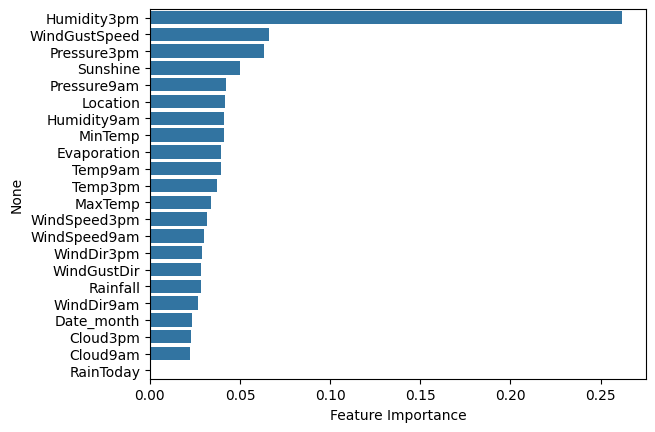

In [ ]:
report_model(model)

# **Logistic Regression**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/preprocessed.csv')
pd.set_option("display.max_columns", None)

In [4]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_month'],
      dtype='object')

In [3]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,50,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,50,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,50,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,50,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,50,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12


In [5]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Get a train test split for cross validation**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

**Scale the x values for better model training**

In [8]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)

**Train the model**

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_model = LogisticRegression()

In [11]:
log_model.fit(scaler_X_train, y_train)

LogisticRegression()

In [12]:
log_model.coef_

array([[ 0.06058328,  0.10067064, -0.27956458,  0.33458519, -0.01753569,
        -0.20149357, -0.01111659,  0.67030488, -0.05191998, -0.15143538,
        -0.091991  , -0.21623923,  0.04636975,  1.1517797 ,  0.79494363,
        -1.14699369,  0.08782399,  0.2162089 ,  0.11787703,  0.14013943,
        -0.04559785,  0.03009855]])

In [13]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_month'],
      dtype='object')

In [14]:
array1 = log_model.coef_[0]
array2 = df.drop('RainTomorrow', axis=1).columns.to_numpy()

# Create a DataFrame from the arrays
df_ = pd.DataFrame({'Coef': array1, 'Feature': array2})
df_

,Coef,Feature
0,0.060583,Location
1,0.100671,MinTemp
2,-0.279565,MaxTemp
3,0.334585,Rainfall
4,-0.017536,Evaporation
5,-0.201494,Sunshine
6,-0.011117,WindGustDir
7,0.670305,WindGustSpeed
8,-0.051920,WindDir9am
9,-0.151435,WindDir3pm


**From the coeff above we can see some of the features are not contributing a lot to the prediction**

In [15]:
y_pred = log_model.predict(scaler_X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

**Testing the accuracy, precision, recall and f1-score**

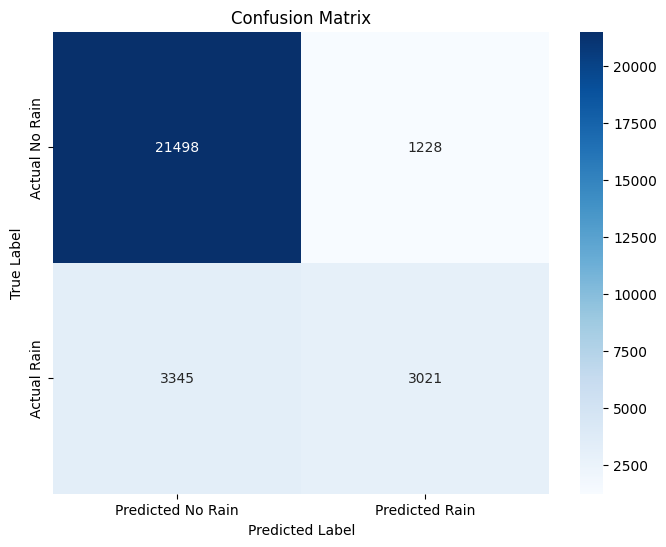

In [17]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.90     22726
        True       0.71      0.47      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [19]:
from sklearn.metrics import precision_score, recall_score

In [20]:
precision_score(y_test, y_pred)

0.710990821369734

In [21]:
recall_score(y_test, y_pred)

0.47455230914231855

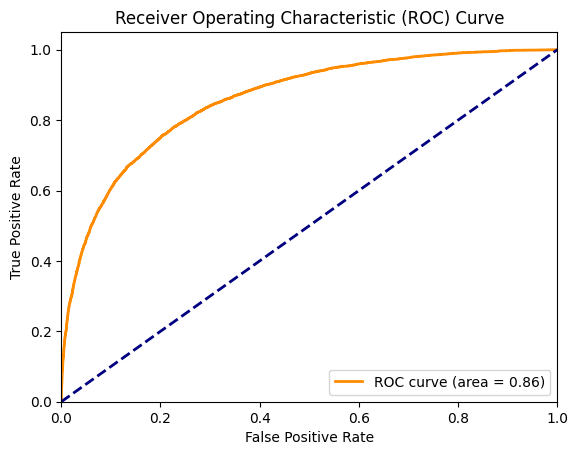

In [22]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_model.predict_proba(scaler_X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Naive Bayes**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/preprocessed.csv')

In [25]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

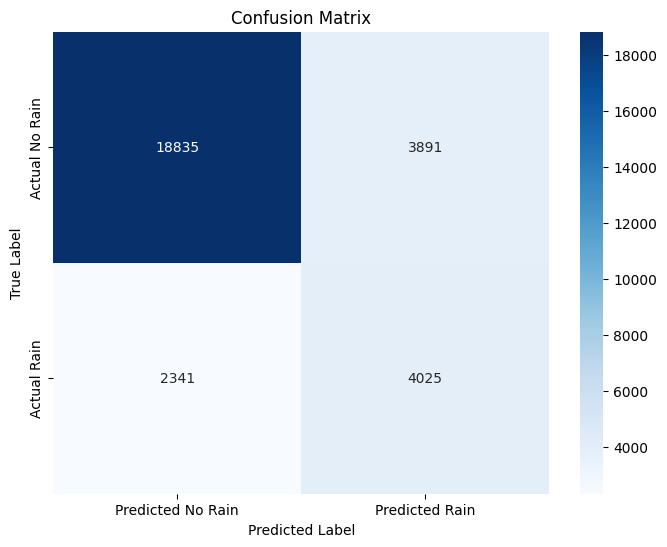

              precision    recall  f1-score   support

       False       0.89      0.83      0.86     22726
        True       0.51      0.63      0.56      6366

    accuracy                           0.79     29092
   macro avg       0.70      0.73      0.71     29092
weighted avg       0.81      0.79      0.79     29092



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = gnb.predict(X_test)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred))

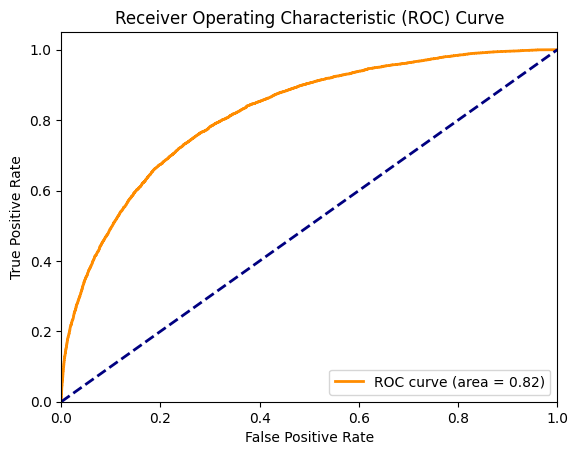

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = gnb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Artificial Neural Network**

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
df = pd.read_csv('/content/preprocessed.csv')
pd.set_option("display.max_columns", None)

In [32]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,50,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,50,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,50,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,50,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,50,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,False,6
145456,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,False,6
145457,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,False,6
145458,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False,6


In [33]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 22)

In [35]:
from tensorflow.keras import layers, models, optimizers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)
model = models.Sequential()
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=22))
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
opt = optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7698 - loss: 0.5741 - val_accuracy: 0.7823 - val_loss: 0.4169
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7980 - loss: 0.4339 - val_accuracy: 0.8345 - val_loss: 0.3981
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8078 - loss: 0.4181 - val_accuracy: 0.8368 - val_loss: 0.3899
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8069 - loss: 0.4160 - val_accuracy: 0.8354 - val_loss: 0.3876
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8087 - loss: 0.4141 - val_accuracy: 0.8378 - val_loss: 0.3837
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8114 - loss: 0.4059 - val_accuracy: 0.8386 - val_loss: 0.3840
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8104 - loss: 0.4097 - val_accuracy: 0.8381 - val_loss: 0.3826
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8069 - los

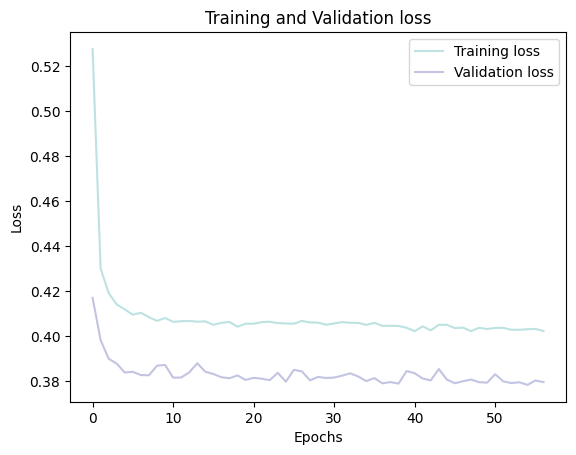

In [36]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

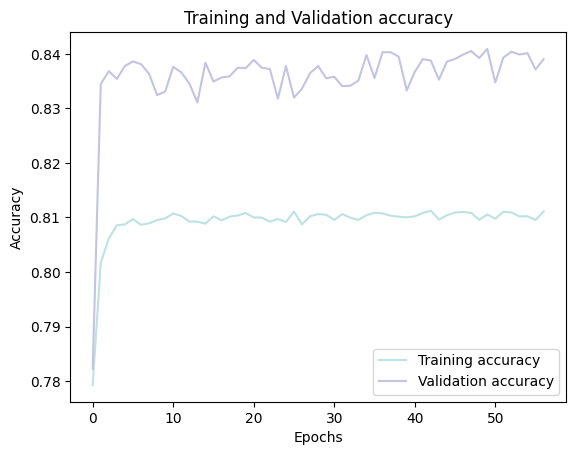

In [37]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

       False       0.86      0.94      0.90     22672
        True       0.70      0.47      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


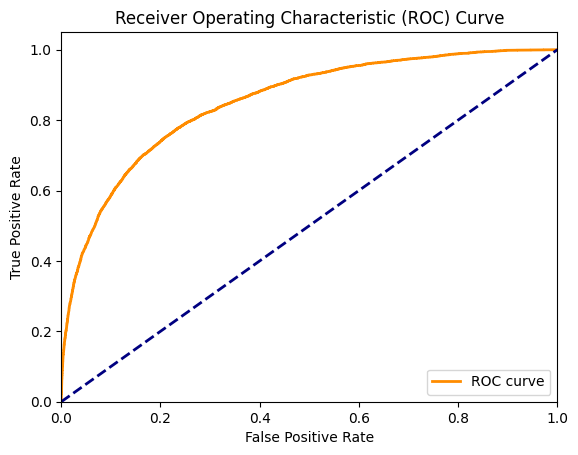

AUC: 0.8514957757328128


In [39]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

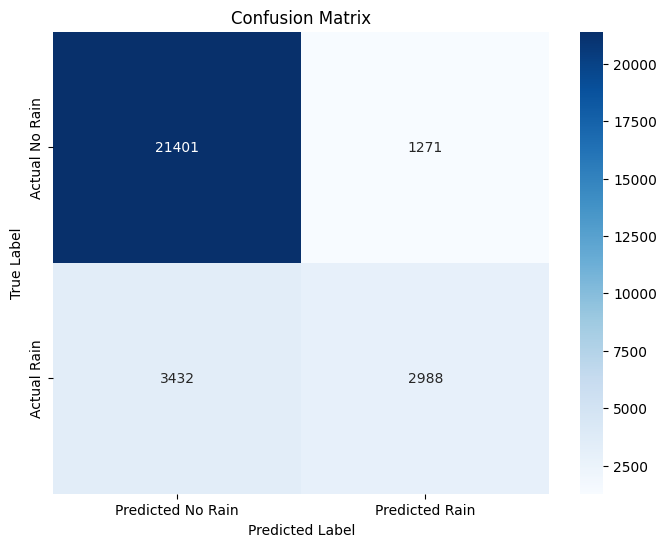

In [40]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()